In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("data/diagnosis.csv")
df.head()

,ID number,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave Points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave Points worst,Symmetry worst,Fractal Dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
df.columns

Index(['ID number', 'Diagnosis', 'Radius mean', 'Texture mean',
       'Perimeter mean', 'Area mean', 'Smoothness mean', 'Compactness mean',
       'Concavity mean', 'Concave Points mean', 'Symmetry mean',
       'Fractal Dimension mean', 'Radius SE', 'Texture SE', 'Perimeter SE',
       'Area SE', 'Smoothness SE', 'Compactness SE', 'Concavity SE',
       'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE',
       'Radius worst', 'Texture worst', 'Perimeter worst', 'Area worst',
       'Smoothness worst', 'Compactness worst', 'Concavity worst',
       'Concave Points worst', 'Symmetry worst', 'Fractal Dimension worst'],
      dtype='object')

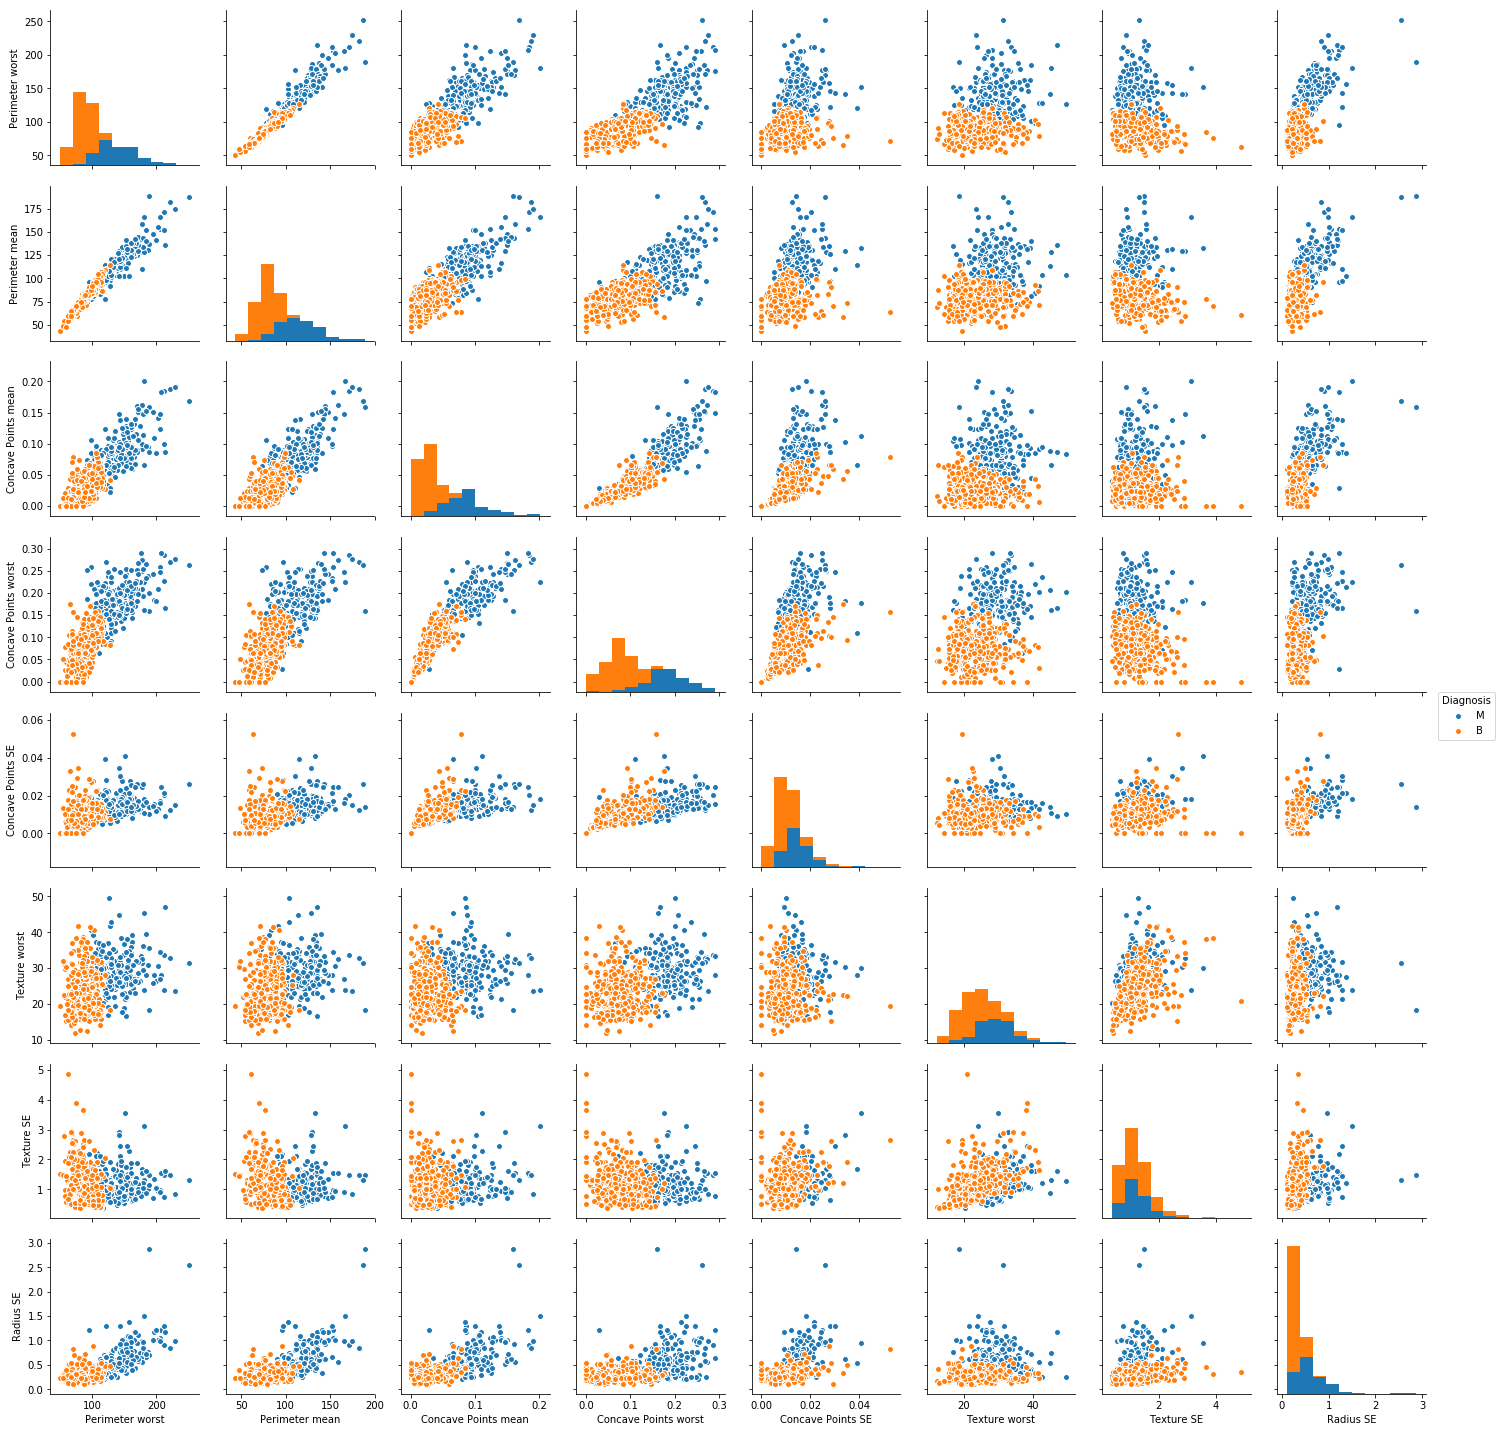

In [13]:
features = ["Perimeter worst", "Perimeter mean", "Concave Points mean", "Concave Points worst", 
            "Concave Points SE", "Texture worst", "Texture SE", "Radius SE" ]
sns.pairplot(df, x_vars = features, y_vars = features, hue="Diagnosis")

In [22]:
# Prepare target data
target = df["Diagnosis"]
target_names = ["malignant", "benigh"]
target = target.map({'M': 1, 'B': 0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [23]:
# Prepare feature data
# data = df.drop("Diagnosis", axis=1)
data = df[features]
feature_names = data.columns
data.head()

,Perimeter worst,Perimeter mean,Concave Points mean,Concave Points worst,Concave Points SE,Texture worst,Texture SE,Radius SE
0,158.80,132.90,0.07017,0.1860,0.01340,23.41,0.7339,0.5435
1,152.50,130.00,0.12790,0.2430,0.02058,25.53,0.7869,0.7456
2,98.87,77.58,0.10520,0.2575,0.01867,26.50,1.1560,0.4956
3,152.20,135.10,0.10430,0.1625,0.01885,16.67,0.7813,0.7572
4,103.40,82.57,0.08089,0.1741,0.01137,23.75,0.8902,0.3345


In [24]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [17]:
# StandardScaler, we use it when we don't know everything about the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [18]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

# Support Vector Machine

In [25]:
# Import Support vector machine linear classifier
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# Model Accuracy
print("Test Acc: %.3f" % model.score(X_test, y_test))

Test Acc: 0.923


In [27]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                           target_names=target_names))

             precision    recall  f1-score   support

  malignant       0.92      0.95      0.94        87
     benigh       0.92      0.87      0.90        55

avg / total       0.92      0.92      0.92       142



# Logistic Regression

In [31]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Fit the model to the training set
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
# Calculate the scores for the training and test sets
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9295774647887324
Test Score: 0.9366197183098591


In [15]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: [1 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [16]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


# K Nearest Neighbor

k: 1, Train/Test Score: 1.000/0.944
k: 3, Train/Test Score: 0.977/0.965
k: 5, Train/Test Score: 0.981/0.958
k: 7, Train/Test Score: 0.977/0.958
k: 9, Train/Test Score: 0.977/0.965
k: 11, Train/Test Score: 0.969/0.965
k: 13, Train/Test Score: 0.967/0.965
k: 15, Train/Test Score: 0.967/0.965
k: 17, Train/Test Score: 0.967/0.972
k: 19, Train/Test Score: 0.965/0.965


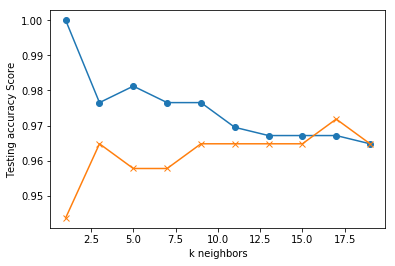

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores =[]
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker="o")
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# k = 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print("k=13 Test Acc: %.3f" % knn.score(X_test, y_test))

k=13 Test Acc: 0.965


# Decision Tree & Random Forest

In [9]:
from sklearn import tree

# Create a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9225352112676056

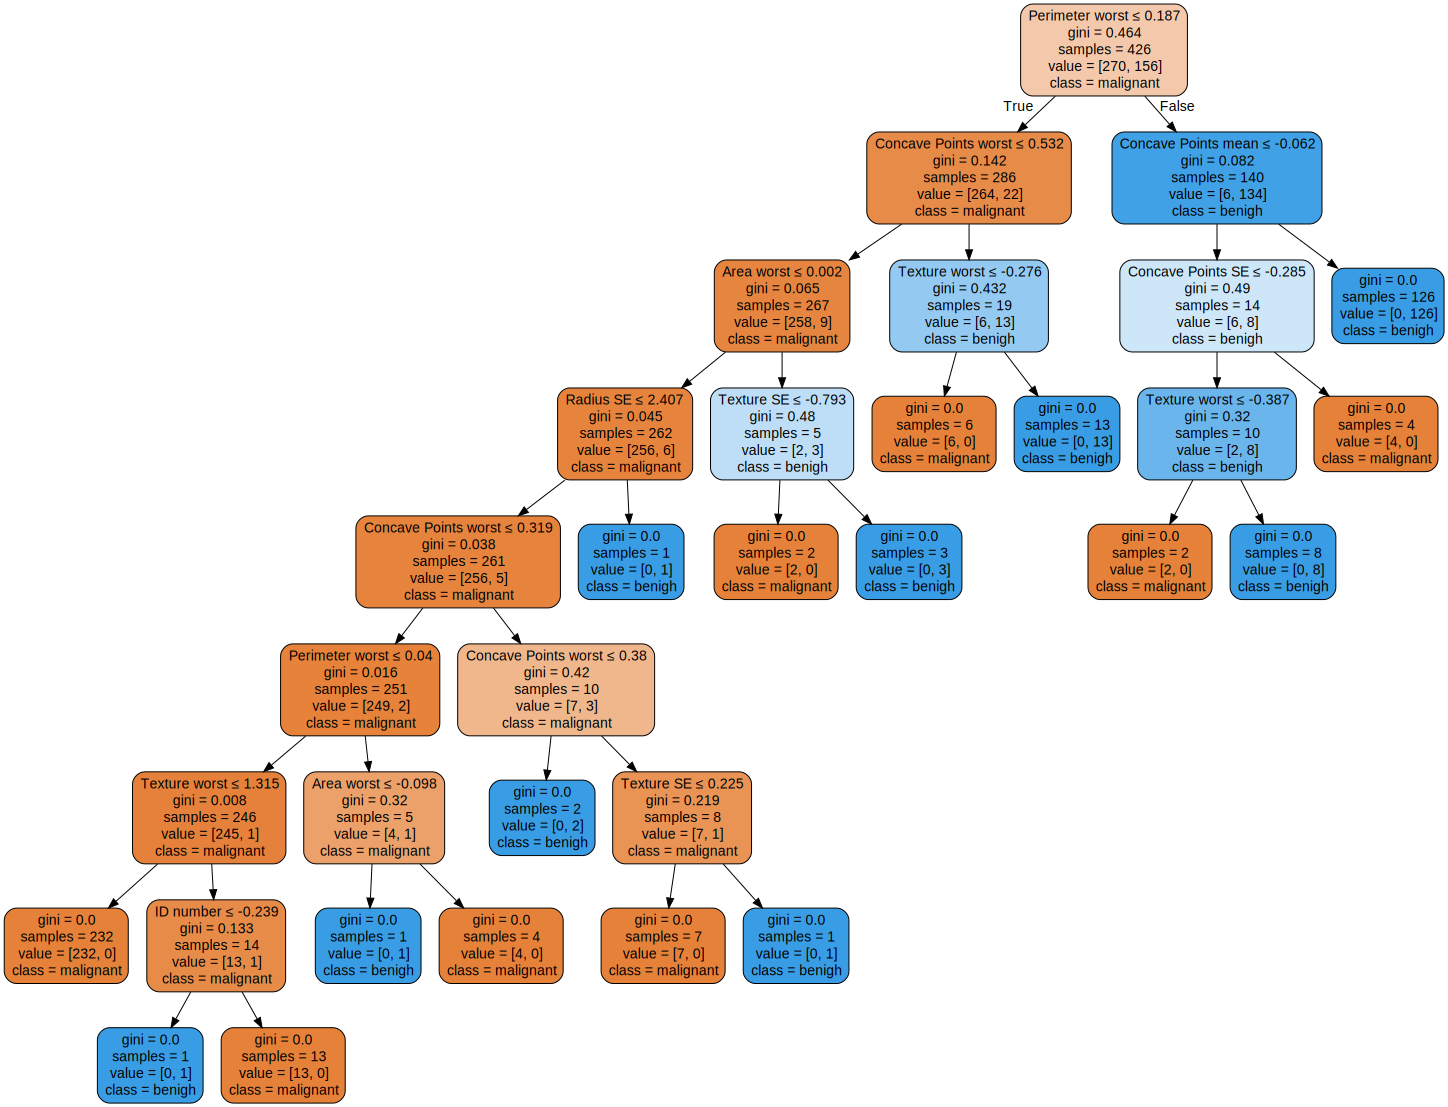

In [10]:
# Use graphviz to visualize the tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names = feature_names,
    class_names = target_names,
    filled=True, rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [21]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9507042253521126

In [22]:
# Sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1451689839014713, 'Perimeter worst'),
 (0.12180612570625787, 'Area worst'),
 (0.1146349674942611, 'Radius worst'),
 (0.11339830802488615, 'Concave Points worst'),
 (0.06866931733928286, 'Radius mean'),
 (0.06512283918511591, 'Concave Points mean'),
 (0.06139962939821987, 'Perimeter mean'),
 (0.04519234820852792, 'Area mean'),
 (0.0343244400855345, 'Concavity mean'),
 (0.030427873527169136, 'Area SE'),
 (0.02600702614366317, 'Concavity worst'),
 (0.020975416615957546, 'Compactness worst'),
 (0.01701926563089477, 'Texture worst'),
 (0.01577125436274843, 'Texture mean'),
 (0.01300010652942009, 'Perimeter SE'),
 (0.01245526381922944, 'Radius SE'),
 (0.01173296272058611, 'Concavity SE'),
 (0.011344735239668995, 'Symmetry worst'),
 (0.01126849801098714, 'Smoothness worst'),
 (0.0103003953337873, 'Compactness mean'),
 (0.006330532161496708, 'Texture SE'),
 (0.006255820210566033, 'Fractal Dimension worst'),
 (0.005955097373622967, 'Smoothness mean'),
 (0.005337852843088614, 'ID number'),
 

# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[84,  3],
       [ 5, 50]])

In [38]:
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9553990610328639
Test Score: 0.9436619718309859


# Deep Learning

In [10]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

//anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=32))
model.add(Dense(units=2, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 14        
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Fit the model to the training data
model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.5294 - acc: 0.6479
Epoch 2/100
 - 0s - loss: 0.4628 - acc: 0.7418
Epoch 3/100
 - 0s - loss: 0.4135 - acc: 0.8052
Epoch 4/100
 - 0s - loss: 0.3791 - acc: 0.8732
Epoch 5/100
 - 0s - loss: 0.3516 - acc: 0.8873
Epoch 6/100
 - 0s - loss: 0.3247 - acc: 0.9085
Epoch 7/100
 - 0s - loss: 0.3007 - acc: 0.9249
Epoch 8/100
 - 0s - loss: 0.2765 - acc: 0.9366
Epoch 9/100
 - 0s - loss: 0.2529 - acc: 0.9460
Epoch 10/100
 - 0s - loss: 0.2301 - acc: 0.9507
Epoch 11/100
 - 0s - loss: 0.2095 - acc: 0.9531
Epoch 12/100
 - 0s - loss: 0.1903 - acc: 0.9624
Epoch 13/100
 - 0s - loss: 0.1739 - acc: 0.9671
Epoch 14/100
 - 0s - loss: 0.1588 - acc: 0.9671
Epoch 15/100
 - 0s - loss: 0.1464 - acc: 0.9671
Epoch 16/100
 - 0s - loss: 0.1351 - acc: 0.9695
Epoch 17/100
 - 0s - loss: 0.1255 - acc: 0.9718
Epoch 18/100
 - 0s - loss: 0.1175 - acc: 0.9718
Epoch 19/100
 - 0s - loss: 0.1098 - acc: 0.9718
Epoch 20/100
 - 0s - loss: 0.1033 - acc: 0.9742
Epoch 21/100
 - 0s - loss: 0.0975 - acc: 0.9742
E

For this network, we simply add an additional hidden layer of 6 nodes

In [28]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=32))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [29]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 14        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [30]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 1.1248 - acc: 0.5258
Epoch 2/100
 - 0s - loss: 0.8639 - acc: 0.6174
Epoch 3/100
 - 0s - loss: 0.6751 - acc: 0.6972
Epoch 4/100
 - 0s - loss: 0.5449 - acc: 0.8122
Epoch 5/100
 - 0s - loss: 0.4482 - acc: 0.8380
Epoch 6/100
 - 0s - loss: 0.3707 - acc: 0.8850
Epoch 7/100
 - 0s - loss: 0.3148 - acc: 0.9061
Epoch 8/100
 - 0s - loss: 0.2722 - acc: 0.9296
Epoch 9/100
 - 0s - loss: 0.2399 - acc: 0.9390
Epoch 10/100
 - 0s - loss: 0.2158 - acc: 0.9437
Epoch 11/100
 - 0s - loss: 0.1961 - acc: 0.9507
Epoch 12/100
 - 0s - loss: 0.1806 - acc: 0.9554
Epoch 13/100
 - 0s - loss: 0.1670 - acc: 0.9554
Epoch 14/100
 - 0s - loss: 0.1549 - acc: 0.9624
Epoch 15/100
 - 0s - loss: 0.1439 - acc: 0.9648
Epoch 16/100
 - 0s - loss: 0.1339 - acc: 0.9648
Epoch 17/100
 - 0s - loss: 0.1243 - acc: 0.9671
Epoch 18/100
 - 0s - loss: 0.1164 - acc: 0.9695
Epoch 19/100
 - 0s - loss: 0.1097 - acc: 0.9718
Epoch 20/100
 - 0s - loss: 0.1040 - acc: 0.9742
Epoch 21/100
 - 0s - loss: 0.0988 - acc: 0.9742
E

# Compare the models below

In [31]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.14086276624666552, Accuracy: 0.9577464788732394


In [32]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.1322729602115045, Accuracy: 0.9507042253521126
